In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def multitime_to_pd(list):
    df = pd.DataFrame(columns = ['Mean', 'Std.Dev.', 'Min', 'Median', 'Max'], index = ['real', 'user', 'sys'])
    for i in range (1,4):
        row = re.sub(' +', ' ', list[i]).split(" ")[:6]
        df.loc[row[0]] = row[1:]        
    return df


def plot_times(df):
    ax = df.plot(x='name', y='time', kind='bar')
    ax.set_xlabel(None)
    ax.set_ylabel('Execution time (s)')
    ax.set_title('Execution Time Comparison')
    
    for i, v in enumerate(df['time']):
        ax.text(i, v, str(v), ha='center', va='bottom', rotation=90)
        
    y_max = ax.get_ylim()
    ax.set_ylim(0, y_max[1] + y_max[1]*0.3) #add 30% of top padding
    plt.show()
   

In [3]:
dfC=multitime_to_pd(open("./compiled/C/c.time", "r").readlines())
dfclang_wasmtime=multitime_to_pd(open("./compiled/WASM/clang-wasmtime.time", "r").readlines())
dfemcc_wasmtime=multitime_to_pd(open("./compiled/WASM/emcc-wasmtime.time", "r").readlines())
dfclang_wasmedge=multitime_to_pd(open("./compiled/WASM/clang-wasmedge.time", "r").readlines())
dfemcc_wasmedge=multitime_to_pd(open("./compiled/WASM/emcc-wasmedge.time", "r").readlines())
dfclang_wamr=multitime_to_pd(open("./compiled/WASM/clang-wamr.time", "r").readlines())
dfemcc_wamr=multitime_to_pd(open("./compiled/WASM/emcc-wamr.time", "r").readlines())


In [4]:
# Extract the execution time values that you want to plot
name_values = ['C', 'clang-wasmtime', 'emcc-wasmtime', 'clang-wasmedge', 'emcc-wasmedge', 'clang-wamr', 'emcc-wamr']

time_values = [float(dfC.loc['real', 'Mean']), 
               float(dfclang_wasmtime.loc['real', 'Mean']), float(dfemcc_wasmtime.loc['real', 'Mean']), 
               float(dfclang_wasmedge.loc['real', 'Mean']), float(dfemcc_wasmedge.loc['real', 'Mean']), 
               float(dfclang_wamr.loc['real', 'Mean']), float(dfemcc_wamr.loc['real', 'Mean'])]

# Create a new dataframe to store the extracted values
df = pd.DataFrame({'name': name_values, 'time': time_values})
df

,name,time
0,C,0.274
1,clang-wasmtime,0.439
2,emcc-wasmtime,0.437
3,clang-wasmedge,45.023
4,emcc-wasmedge,48.803
5,clang-wamr,3.707
6,emcc-wamr,3.590


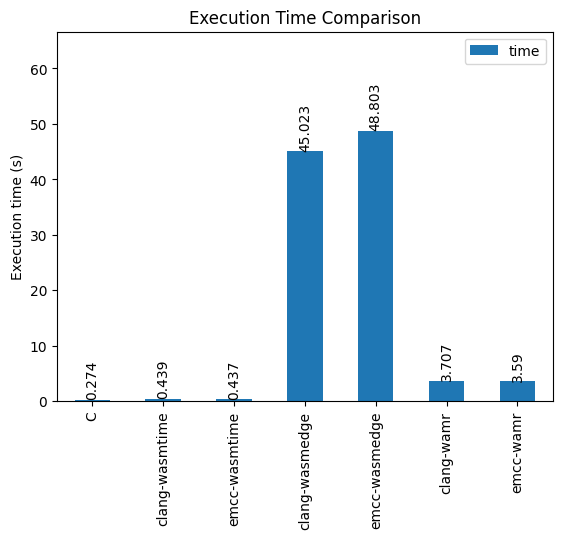

In [5]:
plot_times(df)